Instructions for updating:
non-resource variables are not supported in the long term


Text(0, 0.5, 'Y')

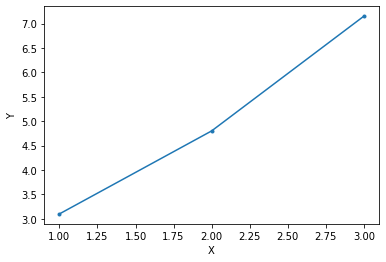

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

x_train = [1, 2, 3]

y_train = [2+1 +0.1, 4+1 -0.2, 6+1 +0.15]

plt.plot(x_train, y_train,'.-')
plt.xlabel('X')
plt.ylabel('Y')

In [2]:
w0 = 5
b0 = -12

In [3]:
W = tf.Variable(w0*tf.ones([1]), name='weight')
b = tf.Variable(b0*tf.ones([1]), name='bias')

In [4]:
hypothesis = x_train * W + b

In [5]:
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

In [6]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
#optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [7]:
sess = tf.Session()

In [8]:
sess.run(tf.global_variables_initializer())

In [9]:
nb_epoch = 2000

In [10]:
for i in range(100):
  if i % 20 ==0:
    print(i)

0
20
40
60
80


In [11]:
vw = [] 
vb = []
vcost = []

In [12]:
for step in range(nb_epoch+1):
  sess.run(train)
  w1 = sess.run(W)[0] # slope
  b1 = sess.run(b)[0] # bias
  cost1 = sess.run(cost)
  vw.append(w1)
  vb.append(b1)
  vcost.append(cost1)
  if step % 100 == 0: # 100번마다 결과 출력해보기 (안해도 되지만..)
    print(step, '--', cost1, '--', w1, '--', b1)

0 -- 47.806065 -- 5.241 -- -11.859667
100 -- 12.644501 -- 6.1511183 -- -8.413013
200 -- 7.8225045 -- 5.2685175 -- -6.406613
300 -- 4.8427997 -- 4.574701 -- -4.8294024
400 -- 3.0015285 -- 4.0292983 -- -3.5895753
500 -- 1.8637304 -- 3.6005616 -- -2.6149547
600 -- 1.1606402 -- 3.263535 -- -1.8488144
700 -- 0.7261731 -- 2.9986017 -- -1.2465585
800 -- 0.45769897 -- 2.7903397 -- -0.77313006
900 -- 0.29179797 -- 2.626627 -- -0.40097266
1000 -- 0.18928118 -- 2.4979334 -- -0.10842239
1100 -- 0.12593222 -- 2.3967688 -- 0.12154846
1200 -- 0.08678614 -- 2.3172443 -- 0.3023268
1300 -- 0.06259633 -- 2.2547305 -- 0.4444353
1400 -- 0.0476485 -- 2.205589 -- 0.5561454
1500 -- 0.038411696 -- 2.1669593 -- 0.6439596
1600 -- 0.0327039 -- 2.1365929 -- 0.71298945
1700 -- 0.029176824 -- 2.1127222 -- 0.7672534
1800 -- 0.026997337 -- 2.0939577 -- 0.80990964
1900 -- 0.025650464 -- 2.079207 -- 0.84344167
2000 -- 0.024818258 -- 2.0676117 -- 0.8698001


In [13]:
w1 = sess.run(W)[0] # slope
b1 = sess.run(b)[0] # bias
str1 = 'y={:.3}x + {:.3}'.format(w1, b1)
print(w1, b1)
print(str1)

2.0676117 0.8698001
y=2.07x + 0.87


Text(0.5, 1.0, 'y=2.07x + 0.87')

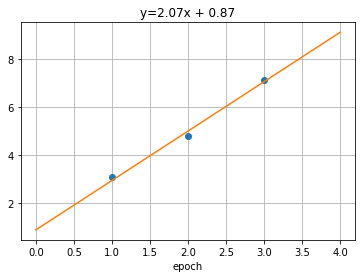

In [14]:
plt.figure(1)
plt.plot(x_train, y_train,'o')
x1 = np.min(x_train)-1, np.max(x_train)+1
y1 = np.dot(w1,x1) + b1
plt.plot(x1, y1)
plt.grid()
plt.xlabel('epoch')
plt.title(str1)

Text(0.5, 0, 'epoch')

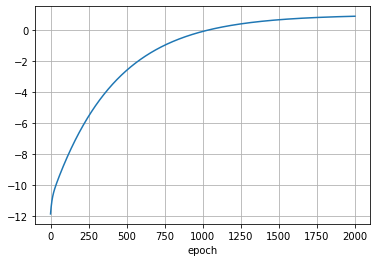

In [15]:
plt.plot(vb)
plt.grid()
plt.xlabel('epoch')

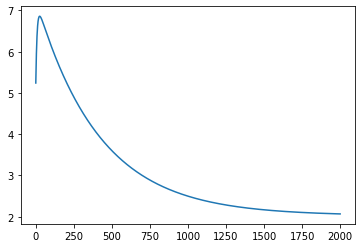

In [16]:
plt.plot(vw)

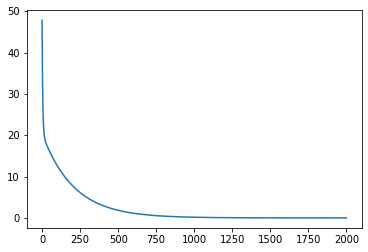

In [17]:
plt.plot(vcost)